In [19]:
import pandas as pd
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
import numpy as np
np.random.seed(42)

#create data

x=heart_disease.drop("target", axis=1)
y=heart_disease["target"]


#splitting data

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

#create classifier

clf=RandomForestClassifier()

#fit the model
clf.fit(x_train, y_train)

#evaluate the model

clf.score(x_test, y_test)

0.8524590163934426

In [22]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)


In [23]:
from sklearn.metrics import roc_curve

#fit the classifier
clf.fit(x_train, y_train)

#make prediction with probabilities
y_probs=clf.predict_proba(x_test)
y_probs[:10], len(y_probs)

(array([[0.03, 0.97],
        [0.67, 0.33],
        [0.82, 0.18],
        [0.89, 0.11],
        [0.72, 0.28],
        [0.11, 0.89],
        [0.43, 0.57],
        [0.21, 0.79],
        [0.43, 0.57],
        [0.07, 0.93]]),
 61)

In [24]:
y_probs_positive=y_probs[:, 1]
y_probs_positive[:10]

array([0.97, 0.33, 0.18, 0.11, 0.28, 0.89, 0.57, 0.79, 0.57, 0.93])

In [15]:
from sklearn.metrics import confusion_matrix
y_preds=clf.predict(x_test)
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 3, 29]], dtype=int64)

In [16]:
pd.crosstab(y_test, y_preds,
            rownames=["Actual label"],
            colnames=["predicted label"])

predicted label,0,1
Actual label,,
0,24,5
1,3,29


## Creating a confusion matrix using scikitlearn


In [17]:
import sklearn
sklearn.__version__

'1.4.2'

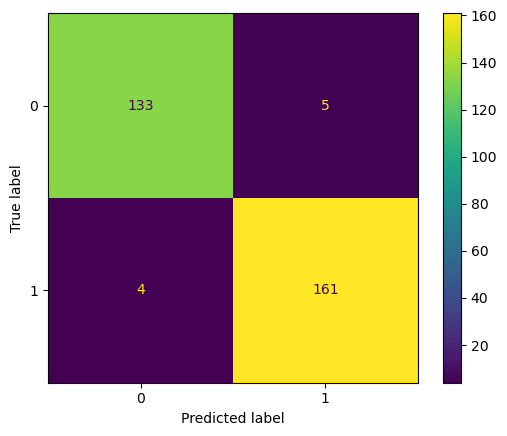

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf,X=x, y=y);

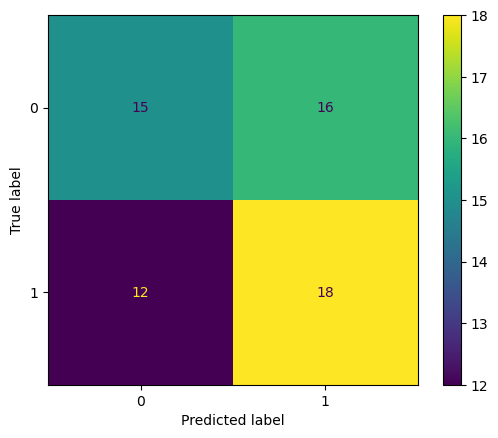

In [29]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_preds);